## Introduction

### Contexte : 

On souhaite entrainé l' IA à prédire le salaire des employés. 

Les colonnes étudiées sont : 

**Age** : L'age des employé(e)s \
**Gender** : Le genre des employé(e)s \
**Education Level** : Le niveau d'étude des employé(e)s \
**Job Title** : Le nom du job des employé(e)s \
**Years of Experience** : Les années d'expérience des employé(e)s \
**Salary** : Le salaire annuel des employé(e)s 

Les données peuvent être trouvées sur Kaggle : https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer \
Le nom du fichier à récupérer est : **Salary Data.csv**

C'est un problème de **régression**.
Pour le résoudre nous allons : 
1. Analyser les données
2. Nettoyer les données 
3. Modéliser les données
4. Entrainer les données
5. Conclusion

Comme nous avons des **données numériques** on va utiliser les algorithmes suivants :
1. Régression Linéaire

2. Gradient Boosting

3. Random Forest

4. Régression Ridge

5. Régression Lasso

## Analyse des données

###  1. Importer les librairies nécessaires

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### 2. Charger les données dans un DataFrame

In [4]:
df = pd.read_csv("salary.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'salary.csv'

### 3. Vérifier les doublons

In [ ]:
df.duplicated().sum()

50

### 4. Vérifier les valeurs nulles

In [ ]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

### 5. Informations du DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


### 6. Descriptif du DataFrame

In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


 ### 7. Lignes dont le salaire est  Supérieur à 190K $

In [ ]:
df.loc[(df.Salary > 190000)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
4,52.0,Male,Master's,Director,20.0,200000.0
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
53,47.0,Male,Master's,VP of Finance,19.0,200000.0
83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0


## Nettoyage des données

### 1. Supprimer les doublons

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### 2. Supprimer les valeurs nulles

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

### 3. Encoder les colonnes Gender, Education Level et Job Title

In [ ]:
gender = LabelEncoder()
df['Gender']=gender.fit_transform(df['Gender'])

education_lvl = LabelEncoder()
df['Education Level'] = education_lvl.fit_transform(df['Education Level'])

job = LabelEncoder()
df['Job Title']=job.fit_transform(df['Job Title'])

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


### 4. Bilan du Feature Engineering

Les valeurs en **doublons** et **nulles** ont été **supprimées** \
Les colonnes **Gender** , **Education Level** et **Job Title** ont été encodés pour le traitement.

## Modélisation des données


### 1. Corrélation entre le salaire et l'âge

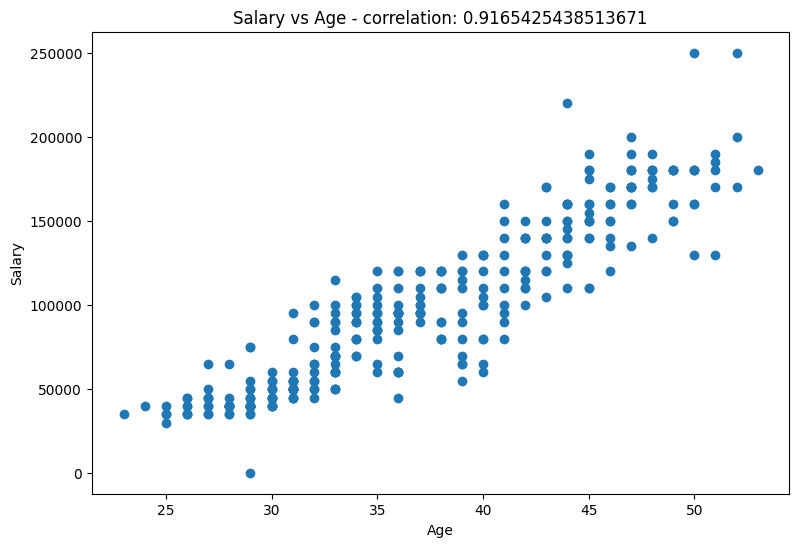

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Age']
label = df['Salary']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Age')
plt.ylabel('Salary')
ax.set_title('Salary vs Age - correlation: ' + str(correlation))
plt.show()

### 2. Corrélation entre le salaire et le genre

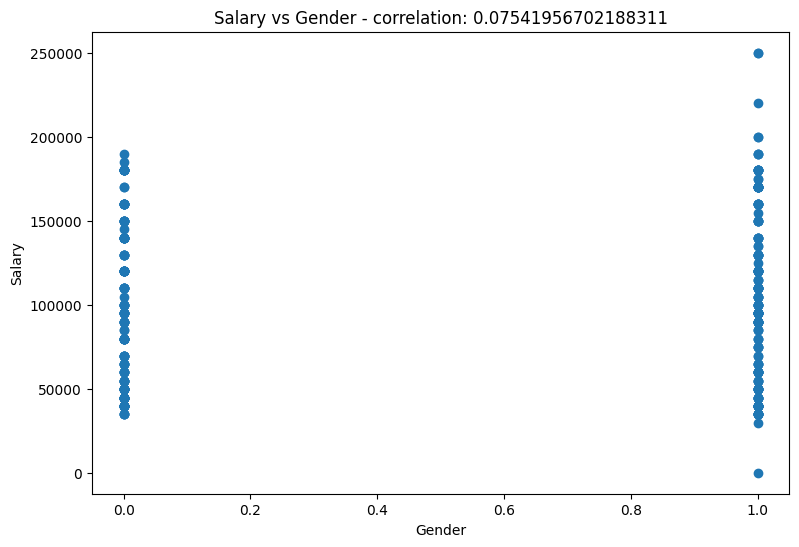

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Gender']
label = df['Salary']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Gender')
plt.ylabel('Salary')
ax.set_title('Salary vs Gender - correlation: ' + str(correlation))
plt.show()

### 3. Corrélation entre le salaire et le niveau d'étude

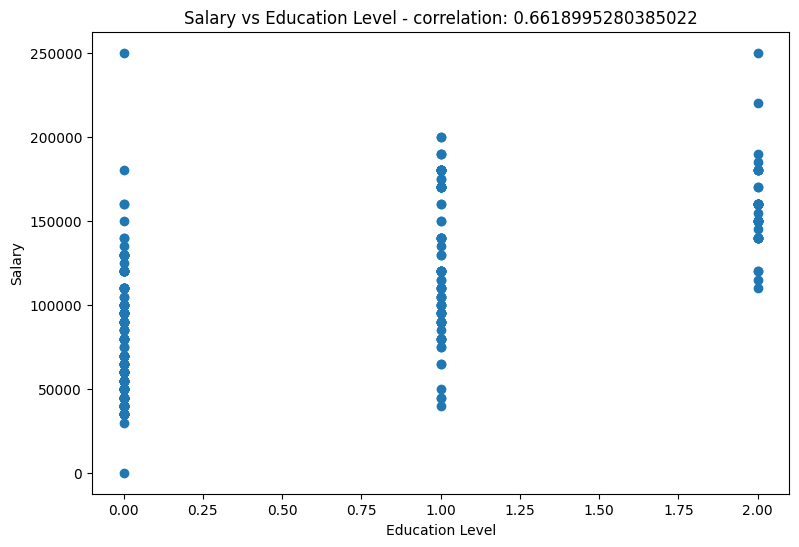

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Education Level']
label = df['Salary']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Education Level')
plt.ylabel('Salary')
ax.set_title('Salary vs Education Level - correlation: ' + str(correlation))
plt.show()

### 4. Corrélation entre le salaire et le job

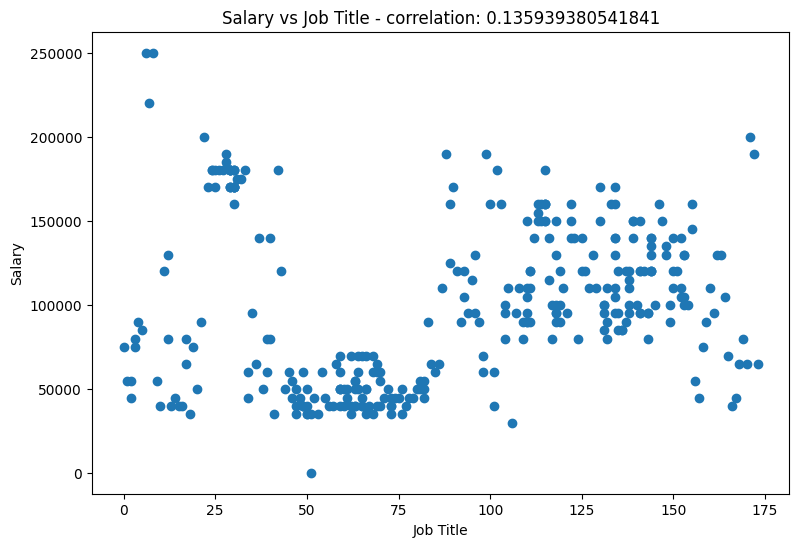

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Job Title']
label = df['Salary']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Job Title')
plt.ylabel('Salary')
ax.set_title('Salary vs Job Title - correlation: ' + str(correlation))
plt.show()

### 5. Corrélation entre le salaire et les années d'expériences

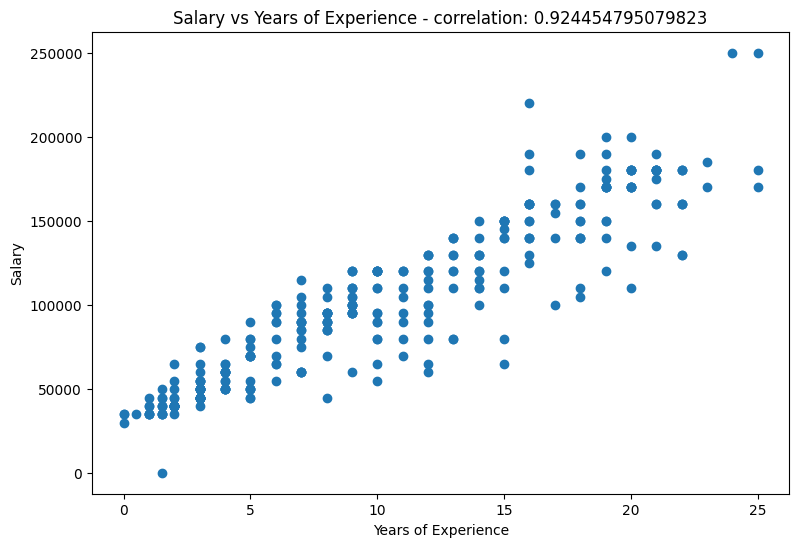

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Years of Experience']
label = df['Salary']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
ax.set_title('Salary vs Years of Experience - correlation: ' + str(correlation))
plt.show()

## Entrainement et optimisation des résultats

### 1. Séparation des features et labels dans 2 variables X et Y 

In [ ]:
X = df[['Age', 'Gender','Years of Experience', 'Education Level','Job Title',]]
Y = df['Salary']

### 2. Séparation des données :  75% pour l'entraînement,  25% pour le test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### 3. Régression Linéaire

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
r2_score(predictions, Y_test)

0.9038428083237761

### 4. Gradient Boosting

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
          
predictions = model.predict(X_test)
r2_score(predictions, Y_test)

0.9232364428932028

### 5. Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
r2_score(predictions, Y_test)

0.9119914833904019

### 6. Régression Ridge

In [ ]:
model = Ridge(alpha=1.0, random_state=42)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
r2_score(predictions, Y_test)

0.9040417708639559

### 7. Régression Lasso

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1.0, random_state=42)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
r2_score(predictions, Y_test)

0.903845193249349

## Présentation des résultats

On obtient des scores très satisfaisants (Entre 0.90 et 0.93)

On remarque que toutes les features sont importantes pour prédire le salaire.

